In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
hd=pd.read_csv("D:\Data Science\iit guwahati\course\Decision Tree and Random Forest\hospital_appointment.csv")

In [56]:
pwd

'C:\\Users\\Vidit'

In [3]:
hd

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
hd.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,39200.0,4.172615e+12,3.173180e+13,9.439170e+13,9.999820e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5030230.0,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.0,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [6]:
hd.shape

(110527, 14)

In [7]:
hd.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [8]:
hd.rename(columns={'No-show':'No_show'}, inplace=True)
hd.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
hd.rename(columns={'Handcap':'Handicap'}, inplace=True)

In [9]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
hd.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No_show           0
dtype: int64

In [11]:
hd.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No_show                2
dtype: int64

In [12]:
hd1=hd[['Gender','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received','No_show']]

In [13]:
hd1

,Gender,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,0,1,0,0,0,0,No
1,M,0,0,0,0,0,0,No
2,F,0,0,0,0,0,0,No
3,F,0,0,0,0,0,0,No
4,F,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...
110522,F,0,0,0,0,0,1,No
110523,F,0,0,0,0,0,1,No
110524,F,0,0,0,0,0,1,No
110525,F,0,0,0,0,0,1,No


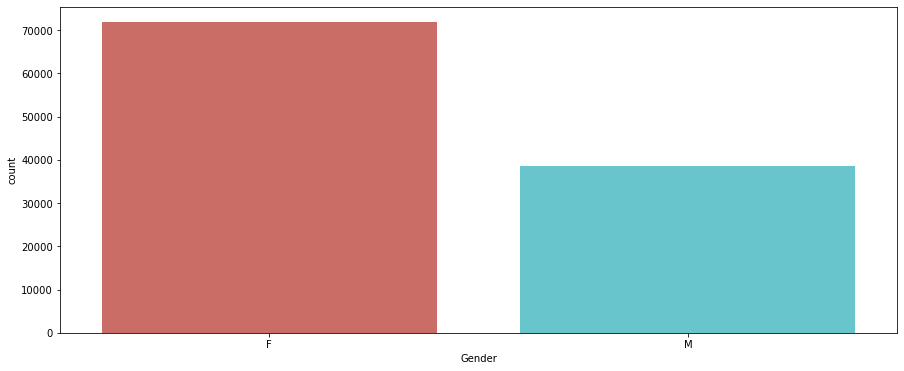

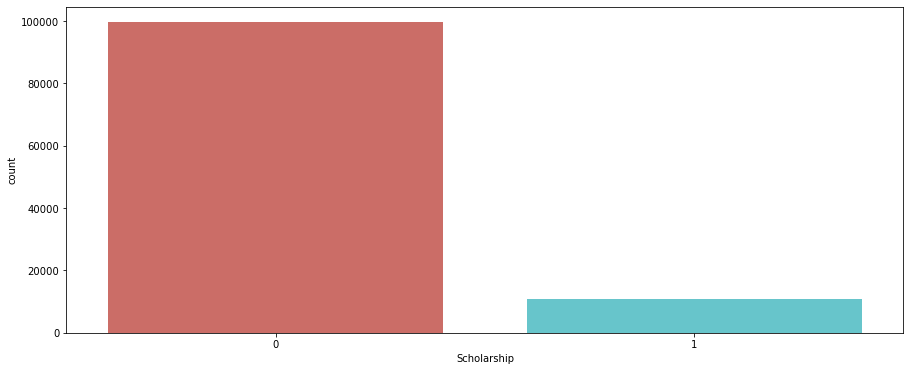

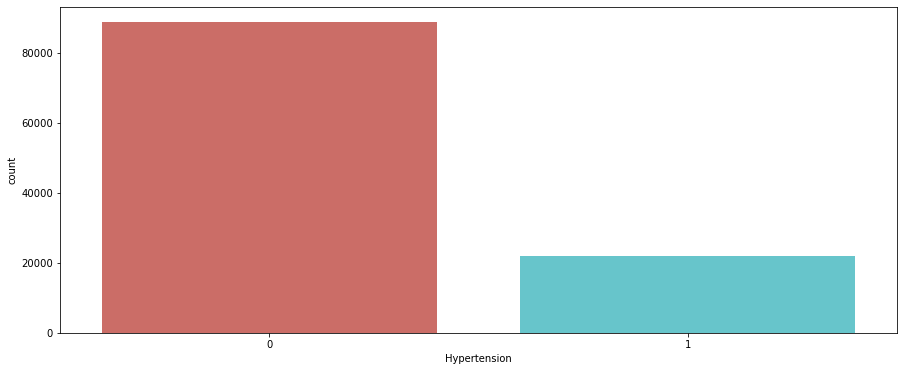

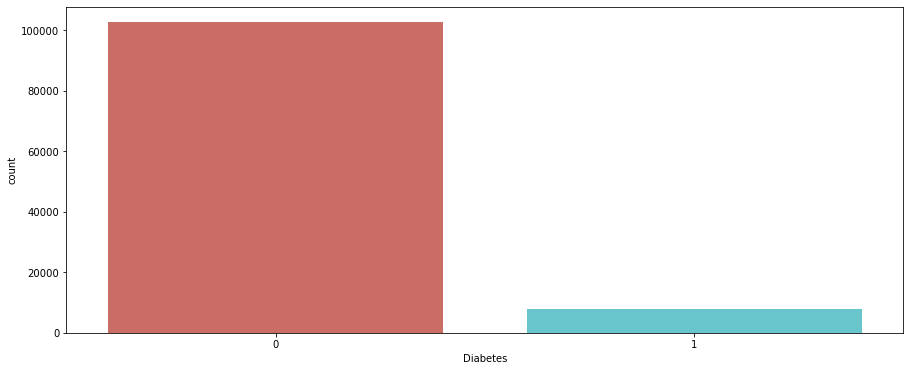

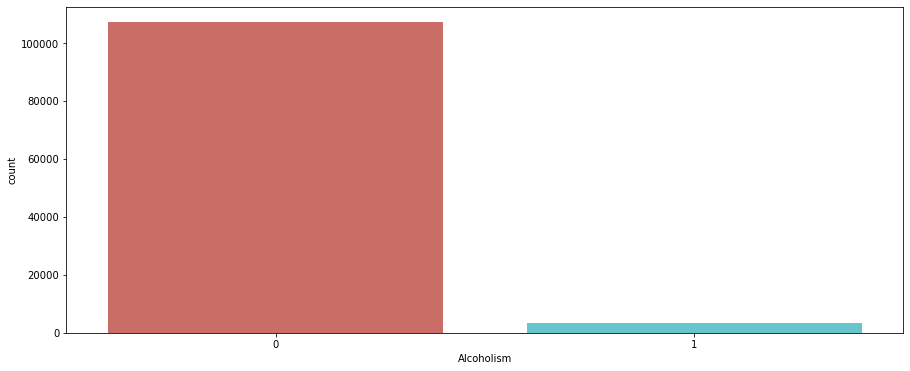

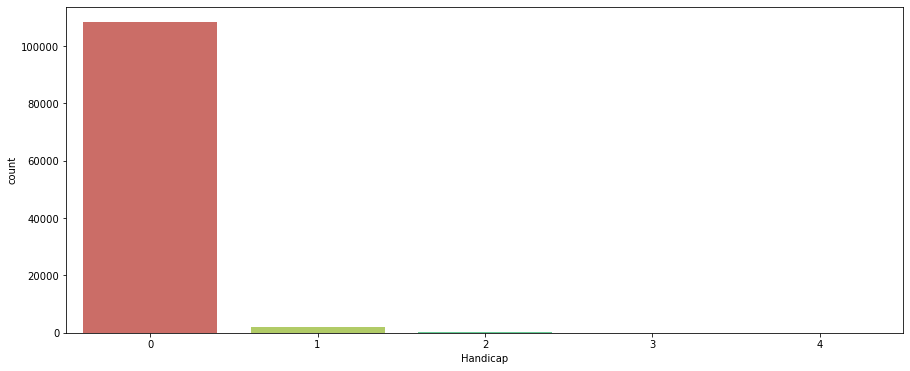

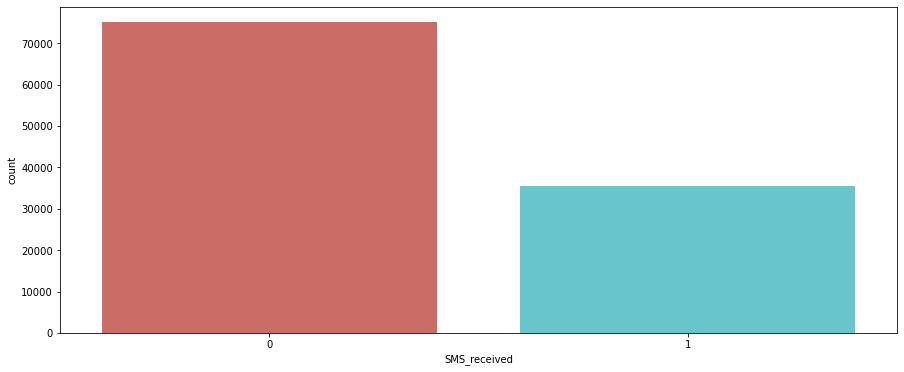

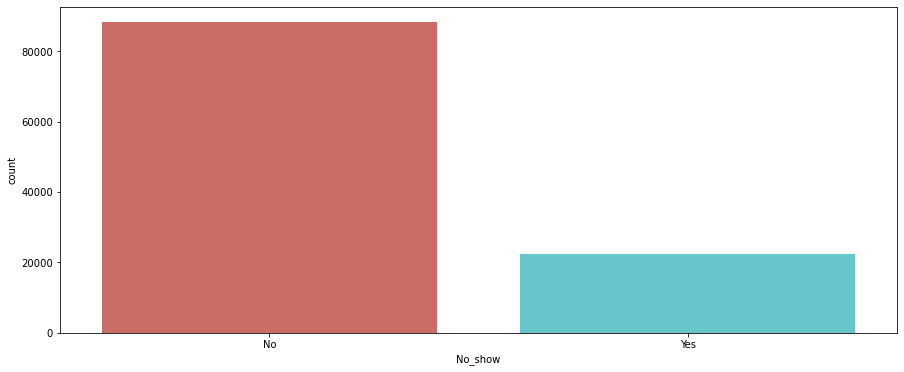

In [14]:
for i in hd1.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(hd1[i],data=hd1,palette='hls')

In [15]:
hd2=hd.copy()

In [16]:
hd2

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [23]:
hd2.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1, inplace=True)

In [24]:
hd2['Age']=hd2['Age'].mean()

In [25]:
hd2

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,37.088874,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,37.088874,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,37.088874,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,37.088874,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,37.088874,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110522,F,37.088874,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,37.088874,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,37.088874,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,37.088874,MARIA ORTIZ,0,0,0,0,0,1,No


In [29]:
hd2['Age'].mean()

37.08887421154044

In [27]:
hd2

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,37.088874,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,37.088874,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,37.088874,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,37.088874,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,37.088874,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110522,F,37.088874,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,37.088874,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,37.088874,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,37.088874,MARIA ORTIZ,0,0,0,0,0,1,No


In [30]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
hd2['Gender']=label.fit_transform(hd2['Gender'])
hd2['No_show']=label.fit_transform(hd2['No_show'])

In [31]:
hd2

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,0,37.088874,JARDIM DA PENHA,0,1,0,0,0,0,0
1,1,37.088874,JARDIM DA PENHA,0,0,0,0,0,0,0
2,0,37.088874,MATA DA PRAIA,0,0,0,0,0,0,0
3,0,37.088874,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,0,37.088874,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
110522,0,37.088874,MARIA ORTIZ,0,0,0,0,0,1,0
110523,0,37.088874,MARIA ORTIZ,0,0,0,0,0,1,0
110524,0,37.088874,MARIA ORTIZ,0,0,0,0,0,1,0
110525,0,37.088874,MARIA ORTIZ,0,0,0,0,0,1,0


In [40]:
x=hd2[['Gender','Age','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received']]

In [41]:
y=hd2[['No_show']]

In [42]:
x

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
0,0,37.088874,0,1,0,0,0,0
1,1,37.088874,0,0,0,0,0,0
2,0,37.088874,0,0,0,0,0,0
3,0,37.088874,0,0,0,0,0,0
4,0,37.088874,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
110522,0,37.088874,0,0,0,0,0,1
110523,0,37.088874,0,0,0,0,0,1
110524,0,37.088874,0,0,0,0,0,1
110525,0,37.088874,0,0,0,0,0,1


In [43]:
y

,No_show
0,0
1,0
2,0
3,0
4,0
...,...
110522,0
110523,0
110524,0
110525,0


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression


In [46]:
log=LogisticRegression(random_state=0)
log.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [47]:
log.score(x_train,y_train)

0.7977629748589136

In [48]:
log.score(x_test,y_test)

0.7992852619198407

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [52]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [53]:
dt.score(x_train,y_train)

0.797921308286493

In [54]:
dt.score(x_test,y_test)

0.7995114448566